In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

In [89]:
# path_template = 'data/atus_anual_{year}.csv'
# dfs_hermosillo = []

# for year in range(1997,2019):
#     file_path = path_template.format(year=year)
    
#     temp = pd.read_csv(file_path, encoding='utf-8')
#     df_hermosillo = temp[(temp['ID_ENTIDAD']==26) & (temp['ID_MUNICIPIO']==30) ].copy()
#     dfs_hermosillo.append(df_hermosillo)
#     print(file_path,'DONE')
    
# df = pd.concat(dfs_hermosillo, ignore_index=True)

# df.to_csv('data/hermosillo.csv', encoding='utf-8',index = None)

# df.head(2)

In [3]:
df = pd.read_csv('data/hermosillo.csv', encoding='utf-8')
df.head(2)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,26,30,1997,1,7,10,30,Jueves,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas
1,Municipal,26,30,1997,1,10,20,3,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas


In [92]:
df[df.columns].describe()

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
count,82740.0,82740.0,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,...,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.000000,82740.0,82740.0
mean,26.0,30.0,2006.712388,6.594730,13.153855,23.554967,15.606756,1.319543,0.069833,0.008158,...,0.003130,0.229998,0.004218,0.074704,0.001124,0.022166,0.000109,0.006889,0.0,0.0
std,0.0,0.0,6.232196,3.473562,6.316782,17.395504,8.726073,0.758046,0.272425,0.092209,...,0.070582,0.717286,0.066102,0.279276,0.033866,0.148613,0.011530,0.094704,0.0,0.0
min,26.0,30.0,1997.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,26.0,30.0,2002.000000,4.000000,9.000000,10.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,26.0,30.0,2006.000000,7.000000,14.000000,25.000000,15.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,26.0,30.0,2012.000000,10.000000,18.000000,40.000000,23.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,26.0,30.0,2018.000000,12.000000,23.000000,59.000000,31.000000,8.000000,6.000000,3.000000,...,4.000000,43.000000,3.000000,5.000000,2.000000,2.000000,2.000000,4.000000,0.0,0.0


In [100]:
df.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID',
       'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA',
       'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET',
       'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO',
       'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO',
       'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO',
       'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'CLASACC',
       'ESTATUS'],
      dtype='object')

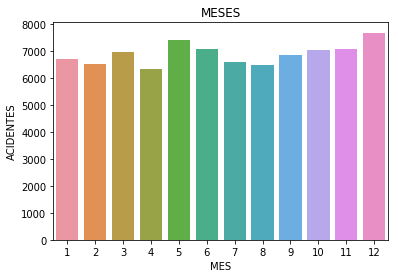

In [164]:
temp = df['MES'].value_counts()
x = temp.index
y = temp.values

p = sns.barplot(x='MES', y='ACIDENTES', data=pd.DataFrame({'MES': x , 'ACIDENTES': y}));
p.set(title='MESES')
p.set_xticklabels(p.get_xticklabels());

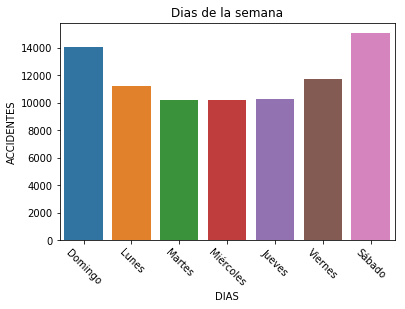

In [171]:
temp = df['DIASEMANA'].value_counts()
x = temp.index
y = temp.values
dias = ['Domingo', 'Lunes','Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

p = sns.barplot(x='DIAS', y='ACCIDENTES', data=pd.DataFrame({'DIAS': x , 'ACCIDENTES': y}), order=dias);
p.set(title='Dias de la semana')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

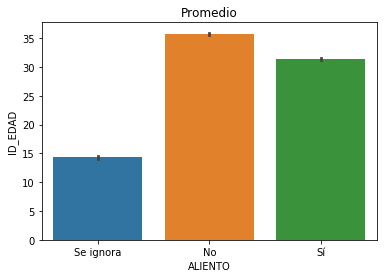

In [161]:
ax = sns.barplot(x='ALIENTO', y = 'ID_EDAD', data=df, estimator=np.mean ,order);
ax.set(title='Promedio')
ax.set_xticklabels(ax.get_xticklabels());

In [175]:
df[df['ALIENTO']=='Sí']

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,DIASEMANA_LE
327,Municipal,26,30,1997,2,15,0,15,Sábado,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,5
329,Municipal,26,30,1997,2,14,0,8,Sábado,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,5
332,Municipal,26,30,1997,2,18,15,16,Domingo,Sin accidente en esta zona,...,1,0,0,0,0,0,0,No fatal,Cifras definitivas,0
337,Municipal,26,30,1997,2,17,0,12,Sábado,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,5
343,Municipal,26,30,1997,2,0,30,6,Jueves,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,1
359,Municipal,26,30,1997,2,19,0,5,Miércoles,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,4
367,Municipal,26,30,1997,2,18,30,17,Lunes,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,2
413,Municipal,26,30,1997,2,20,30,11,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,5
418,Municipal,26,30,1997,2,19,15,22,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo Daños,Cifras definitivas,5
429,Municipal,26,30,1997,2,21,50,22,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras definitivas,5
